# 3) US Baby Names 1880–2017

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import json

from collections import defaultdict
from collections import Counter

Podatki: http://www.ssa.gov/oact/babynames/limits.html.

In [1]:
!head -n 10 data/DATA_03_names/yob1880.txt

In [6]:
names1880 = pd.read_csv('data/DATA_03_names/yob1880.txt',
                       names=['name', 'spol', 'stevilo'])

In [7]:
names1880.head()

,name,spol,stevilo
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [8]:
names1880.groupby('spol')['stevilo'].sum()

spol
F     90993
M    110491
Name: stevilo, dtype: int64

In [9]:
years = range(1880, 2018)

In [10]:
pieces = []

In [11]:
columns = ['ime', 'spol', 'stevilo']

In [17]:
for year in years:
    path = f'data/DATA_03_names/yob{year}.txt'
    frame = pd.read_csv(path, names=columns)
    frame['leto'] = year
    pieces.append(frame)

In [19]:
names = pd.concat(pieces, ignore_index=True)

In [20]:
names.head()

,ime,spol,stevilo,leto
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [21]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 4 columns):
ime        object
spol       object
stevilo    int64
leto       int64
dtypes: int64(2), object(2)
memory usage: 58.7+ MB


In [22]:
total_births = names.pivot_table('stevilo', index='leto', columns='spol', aggfunc=sum)

In [23]:
total_births.tail()

spol,F,M
leto,,
2013,1750321,1886989
2014,1781072,1915239
2015,1778883,1909804
2016,1763916,1889052
2017,1711811,1834490


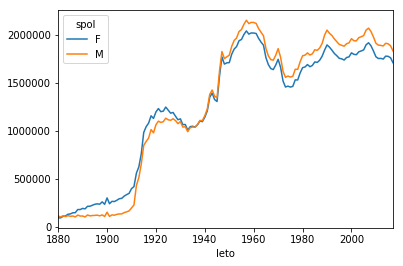

In [24]:
total_births.plot()

In [26]:
def add_prop(group):
    group['prop'] = group['stevilo'] / group['stevilo'].sum()
    return group

In [27]:
names = names.groupby(['leto', 'spol']).apply(add_prop)

In [28]:
names.head()

,ime,spol,stevilo,leto,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [ ]:
names.groupby(['leto', 'spol'])